In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [10]:
datapath = 'datasets/sentiment labelled sentences/amazon_cells_labelled.txt'

reviews = pd.read_csv(datapath, sep = '\t', header = None)

In [11]:
print(reviews.head())

                                                   0  1
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1


In [163]:
datapath = 'datasets/sentiment labelled sentences/yelp_labelled.txt'

reviews = pd.read_csv(datapath, sep = '\t', header = None)
reviews.columns = ['review', 'positive']

In [164]:
print(reviews.head())

                                              review  positive
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1


In [165]:
reviews.positive = (reviews.positive == True)
print(reviews.head())

                                              review  positive
0                           Wow... Loved this place.      True
1                                 Crust is not good.     False
2          Not tasty and the texture was just nasty.     False
3  Stopped by during the late May bank holiday of...      True
4  The selection on the menu was great and so wer...      True


In [166]:
poswords = []
poswordcount = []
negwords = []
negwordcount = []

In [167]:
#instead of guessing which words are more common, we'll let the computer figure it out for us
#we'll count unique words, separated by positive/negative sentiment, and see if there are some common ones
#positive reviews first
for sentence in reviews[reviews.positive==1].review:
    wordlist = sentence.split()
    #for each positive review, split it up into its words
    for word in wordlist:
        word = word.strip('.!?,\';:+-()[]{}/@%$_')#remove special characters and only compare in lowercase
        if word.lower() in poswords:#if we already recorded this word just increment the count of it
            poswordcount[poswords.index(word.lower())] += 1
        else:#if we haven't found this word before, add it to the list, and give it a count of 1
            poswords.append(word.lower())
            poswordcount.append(1)

print(poswords[:5])
print(len(poswords))
print(poswordcount[:5])
print(len(poswordcount))

['wow', 'loved', 'this', 'place', 'stopped']
1254
[3, 10, 77, 57, 2]
1254


In [168]:
#now for negative reviews
for sentence in reviews[reviews.positive==0].review:
    wordlist = sentence.split()
    #for each negative review, split it up into its words
    for word in wordlist:
        word = word.strip('.!?,\';:+-()[]{}/@%$_')#remove special characters and only compare in lowercase
        if word.lower() in negwords:#if we already recorded this word just increment the count of it
            negwordcount[negwords.index(word.lower())] += 1
        else:#if we haven't found this word before, add it to the list, and give it a count of 1
            negwords.append(word.lower())
            negwordcount.append(1)
            
print(negwords[:5])
print(len(negwords))
print(negwordcount[:5])
print(len(negwordcount))

['crust', 'is', 'not', 'good', 'tasty']
1415
[2, 67, 98, 22, 3]
1415


In [169]:
poswordframe = pd.DataFrame()
poswordframe['poswords'] = poswords
poswordframe['poswordcount'] = poswordcount

negwordframe = pd.DataFrame()
negwordframe['negwords'] = negwords
negwordframe['negwordcount'] = negwordcount

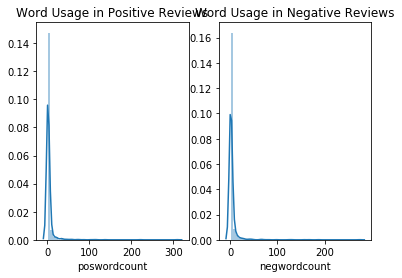

avg pos word count: 4.1028708133971294
avg neg word count: 4.062897526501767


In [170]:
plt.subplot(121)
plt.title('Word Usage in Positive Reviews')
sns.distplot(poswordframe.poswordcount)
plt.subplot(122)
plt.title('Word Usage in Negative Reviews')
sns.distplot(negwordframe.negwordcount)
plt.show()

print('avg pos word count: ' + str((sum(poswordcount)/len(poswordcount))))
print('avg neg word count: ' + str((sum(negwordcount)/len(negwordcount))))

In [171]:
#let's just see if we can get all the words used more than 5 times since thats above average usage in a review
#if there aren't too many words, we'll use these as features, otherwise we'll cut down the number of words again
commonposwords = poswordframe[poswordframe.poswordcount >= 5]
commonnegwords = negwordframe[negwordframe.negwordcount >= 5]
#commonposwords = commonposwords.sort_values(by='poswordcount', ascending=False)
#commonnegwords = commonnegwords.sort_values(by='negwordcount', ascending=False)
print(commonposwords.head())
print(commonnegwords.head())

  poswords  poswordcount
1    loved            10
2     this            77
3    place            57
5       by            11
7      the           310
  negwords  negwordcount
1       is            67
2      not            98
3     good            22
5      and           167
6      the           274


In [172]:
shared = commonposwords.iloc[np.where(commonposwords.poswords.isin(commonnegwords.negwords))]
uniquepos = commonposwords[~commonposwords.poswords.isin(commonnegwords.negwords)]
uniqueneg = commonnegwords[~commonnegwords.negwords.isin(commonposwords.poswords)]

In [173]:
'''
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'important']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
'''

"\nkeywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'important']\n\nfor key in keywords:\n    # Note that we add spaces around the key so that we're getting the word,\n    # not just pattern matching.\n    sms_raw[str(key)] = sms_raw.message.str.contains(\n        ' ' + str(key) + ' ',\n        case=False\n    )\n"

In [174]:
for posword in uniquepos.poswords:
    reviews[posword] = reviews.review.str.contains(posword, case=False)
print(reviews.head())

                                              review  positive  loved  \
0                           Wow... Loved this place.      True   True   
1                                 Crust is not good.     False  False   
2          Not tasty and the texture was just nasty.     False  False   
3  Stopped by during the late May bank holiday of...      True   True   
4  The selection on the menu was great and so wer...      True  False   

   selection   menu  great  prices  tried  amazing  friendly  ...    twice  \
0      False  False  False   False  False    False     False  ...    False   
1      False  False  False   False  False    False     False  ...    False   
2      False  False  False   False  False    False     False  ...    False   
3      False  False  False   False  False    False     False  ...    False   
4       True   True   True    True  False    False     False  ...    False   

   absolutely  reasonable  happy  perfect  family  enjoyed    bar  awesome  \
0       False 

In [175]:
for negword in uniqueneg.negwords:
    reviews[negword] = ~reviews.review.str.contains(negword, case=False)
print(reviews.head())

                                              review  positive  loved  \
0                           Wow... Loved this place.      True   True   
1                                 Crust is not good.     False  False   
2          Not tasty and the texture was just nasty.     False  False   
3  Stopped by during the late May bank holiday of...      True   True   
4  The selection on the menu was great and so wer...      True  False   

   selection   menu  great  prices  tried  amazing  friendly   ...    done  \
0      False  False  False   False  False    False     False   ...    True   
1      False  False  False   False  False    False     False   ...    True   
2      False  False  False   False  False    False     False   ...    True   
3      False  False  False   False  False    False     False   ...    True   
4       True   True   True    True  False    False     False   ...    True   

   fries  terrible  after  anytime  long   two  tasted  dishes  barely  
0   True      True 

In [178]:
features = reviews[uniquepos.poswords.tolist() + uniqueneg.negwords.tolist()]
results = reviews.positive

In [179]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(features, results)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [180]:
predictions = model.predict(features)

print('Total reviews: ' + str(features.shape[0]))
print('Correct predictions : ' + str((results==predictions).sum()))

Total reviews: 1000
Correct predictions : 833


Well, it works with 81.6 percent accuracy for the amazon reviews. I guess that's ok. 
After trying it on the yelp reviews, the same approach had 83.3% accuracy when used to predict the training data.
(I point out that it is predicting the training data because this does not guarantee that it will work on other data)